In [19]:
import pandas as pd
def run():
    import datetime 
    df3=pd.read_csv('filtered_data.csv')
    #df3=df3[(df3.vesselID==20)]
    df3['date'] = df3['datetime'].apply(lambda x: x.split(' ')[0])
    df3['Ye']=df3['date'].str.contains('12/', na=False)
    df3['Ye']=df3['Ye'].apply(lambda x: 'True' if x else 'False')
    #print(df3['Ye'])
    df3['date'] = df3.apply(my_replace, axis=1)

    #print(df3['date'])
    df3['leftdockdt'] = df3['date'].map(str)+' '+ df3['leftdock']+df3['leftdockAMPM']
    df3['datetime']=df3['date'].map(str)+' '+ df3['datetime'].apply(lambda x: x.split(' ')[3])
    df3['temp']=df3['leftdockdt']
    #pd.to_datetime(df3['leftdockdt'])
    #pd.to_datetime(df3['datetime'])
    print(df3['datetime'])
    #df3['leftdockdt']=df3['leftdockdt'].apply(lambda x: datetime.datetime.strptime(str(x), '%m/%d/%Y %I:%M'))
    df3.to_csv('filtered_dataID.csv')
def my_replace(row):
    if  row['Ye']=='True':
        
        return row['date']+'/2015'
       
    else:
        return row['date']+'/2016'
        

if __name__ == '__main__':
    
    run()

0         12/29/2015 13:06
1         12/29/2015 13:06
2         12/29/2015 13:06
3         12/29/2015 13:06
4         12/29/2015 13:06
5         12/29/2015 13:06
6         12/29/2015 13:06
7         12/29/2015 13:06
8         12/29/2015 13:06
9         12/29/2015 13:06
10        12/29/2015 13:06
11        12/29/2015 13:06
12        12/29/2015 13:06
13        12/29/2015 13:06
14        12/29/2015 13:06
15        12/29/2015 13:06
16        12/29/2015 13:06
17        12/29/2015 13:06
18        12/29/2015 13:06
19        12/29/2015 13:06
20        12/28/2015 00:39
21        12/29/2015 13:06
22        12/29/2015 13:06
23        12/29/2015 13:06
24        12/29/2015 13:07
25        12/29/2015 13:07
26        12/29/2015 13:07
27        12/29/2015 13:07
28        12/29/2015 13:07
29        12/29/2015 13:07
                ...       
237522      1/5/2016 11:35
237523      1/5/2016 11:35
237524      1/5/2016 11:35
237525      1/3/2016 03:33
237526      1/5/2016 11:35
237527      1/5/2016 11:35
2

In [26]:
from datetime import timedelta
import pandas as pd
import datetime
dff5=pd.DataFrame()
dff=pd.read_csv('filtered_dataID.csv')
#dff=dff[(dff.vesselID==20)]
#print(dff['datetime'])
#dff2=dff[dff['datetime'] == dff.groupby(['leftdockdt','vesselID'])['datetime'].transform(max)]
dff2=dff.groupby(['leftdockdt','vesselID'])#.agg({'datetime':'max'})
#dff2= dff2.reset_index()

#dff2 = dff2.rename(columns={'datetime':'datetime2'})

#dff2 = pd.merge(dff, dff2, how='left', on=['leftdockdt', 'vesselID'])

#dff2 = dff2[dff2['datetime'] == dff2['datetime2']]
#print(dff2)
dff2=dff2.agg(lambda x: x.iloc[-1])
dff2['arrival_time'] = dff2['datetime']
#print(dff2['arrival_time'])
dff2['arrival_time']=dff2['arrival_time'].apply(lambda x: datetime.datetime.strptime(x, '%m/%d/%Y %H:%M'))

dff2['arrival_time']=dff2['arrival_time']+timedelta(minutes=1)
dff2['temp']=dff2['temp'].apply(lambda x: datetime.datetime.strptime(x, '%m/%d/%Y %I:%M%p'))
dff2['temp']=dff2['temp'].apply(lambda x: datetime.datetime.strftime(x, '%m/%d/%Y %H:%M'))
dff2['arrival_time']=dff2['arrival_time'].apply(lambda x: datetime.datetime.strftime(x, '%m/%d/%Y %H:%M'))
dff2['arrival_time']=pd.to_datetime(dff2['arrival_time'])
dff2['temp']=pd.to_datetime(dff2['temp'])
#print(dff2[['temp','arrival_time']])


dff2['dur']=(dff2['arrival_time']-dff2['temp'])
dff2.to_csv('filtered_dur.csv')
print(dff2.head())

                           Unnamed: 0  Unnamed: 0.1           aterm  \
leftdockdt       vesselID                                             
1/1/2016 10:01AM 17             98292            12       Bremerton   
                 18             97422             6        Mukilteo   
                 19             97421             5         Clinton   
1/1/2016 10:02PM 19            114653             5         Clinton   
                 65            114664            16  Point Defiance   

                          aterm_abbrev  aterm_id        datetime  \
leftdockdt       vesselID                                          
1/1/2016 10:01AM 17                BRE         4  1/1/2016 10:51   
                 18                MUK        14  1/1/2016 10:15   
                 19                CLI         5  1/1/2016 10:15   
1/1/2016 10:02PM 19                CLI         5  1/1/2016 22:13   
                 65                PTD        16  1/1/2016 22:13   

                         

In [229]:
dff6=pd.read_csv('filtered_dur.csv')
dff6['route'].unique()

array(['SEA-BR', 'MUK-CL', 'PD-TAL', 'ANA-SJ', 'F-V-S', 'PT-COU', 'SEA-BI',
       'ED-KING', nan], dtype=object)

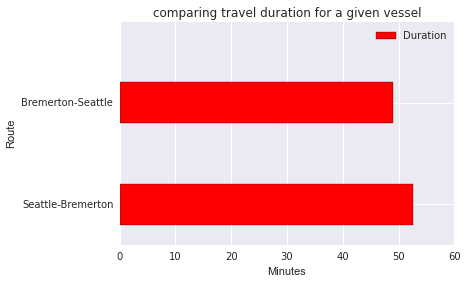

In [236]:
%matplotlib inline
def draw(ID,d,o):
    import matplotlib.pyplot as plt
    import numpy as np
    df8=pd.read_csv('filtered_dur.csv')
    dft=df8[(df8.vesselID==ID ) ]
    dft=dft[(dft.aterm==d)]
    dft=dft[(dft.lastdock==o)]
    
    #print(dft['dur'])
    dft['dur_min']= dft['dur'].apply(duration2sec)
    dft=dft[(dft.dur_min>=8)]
    time=dft['dur_min'].mean()
    dft2=df8[(df8.vesselID==ID ) ]
    dft2=dft2[(dft2.aterm==o)]
    dft2=dft2[(dft2.lastdock==d)]
    dft2['dur_min']= dft2['dur'].apply(duration2sec)
    dft2=dft2[(dft2.dur_min>=8)]
    time2=dft2['dur_min'].mean()
    values=[time,time2]
    
    lables=[o+'-'+d,d+'-'+o]
    
        #print('comparision can be made')
                                  
    ind = np.arange(len(lables))
    width = 0.4

    fig, ax = plt.subplots()
    ax.barh(ind, values, width, color='red', label='Duration')
    ax.set_ylabel('Route')
    ax.set_xlabel('Minutes')
    ax.set_title('comparing travel duration for a given vessel ')

    ax.set(yticks=ind+width/2, yticklabels=lables, ylim=[2*width - 1, len(lables)])
    ax.legend()
    #plt.update({'figure.autolayout': True})
    plt.savefig('routeave2.png',bbox_inches='tight')
    plt.show()
        #pl.tight_layout()
    
    #print(time2)
    #(diff.days * 24 * 60) + (diff.seconds/60)
    #time = pd.DatetimeIndex(dft['dur'])
    #print(dft2[['dur_min','datetime','temp']])
    #print(dft[['dur_min','datetime','temp']])
    #print(time)
def duration2sec(string):
    if "days" in string:
        days = string.split()[0]
        hours = string.split()[2].split(':')
        return (int(days) * 1440 + int(hours[0]) * 60 + int(hours[1]))
    else:
        hours = string.split(':')
        return (int(hours[0]) * 60 + int(hours[1]))
def run():
    df7=pd.read_csv('filtered_dur.csv')
    ID=17
    dest='Bremerton'
    orig='Seattle'
    
    #draw()
    #df7=df7[(df7.vesselID==17)]
    #print(df7[['dur','aterm','lastdock']])
    draw(ID,dest,orig)
if __name__ == '__main__':
    
    run()

     route    dur_min
0   ANA-SJ  33.699571
1  ED-KING  22.234043
2    F-V-S  14.536842
3   MUK-CL  14.139113
4   PD-TAL  12.477273
5   PT-COU  28.100000
6   SEA-BI  31.091483
7   SEA-BR  52.165094


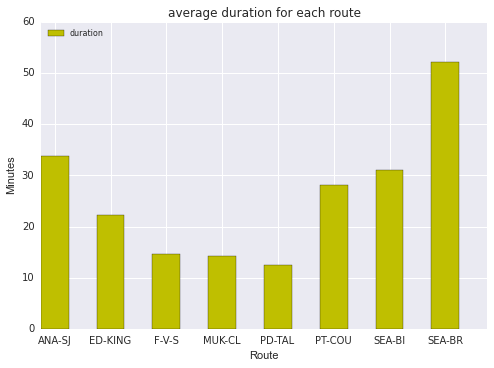

In [231]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn
def run():
    dff9=pd.read_csv('filtered_dur.csv')
    dff9['dur_min']=dff9['dur'].apply(duration2sec)
    
    #print(dff9[['dur','dur_min']])
#print(dff9['dur'])
    dff9=dff9[dff9.dur_min>=8]
    dff9.to_csv('filtered_durmin.csv')
    count=dff9.groupby(['route'])['dur_min'].mean()
    count=count.reset_index()
    #count.plot()
    print(count)
    
    ind = np.arange(len(count)) 
    width = 0.5
    fig, r = plt.subplots()
    rect = r.bar(ind, count['dur_min'], width, color='y', label='duration')
#rect2=r.bar(ind+width, On_Time, width, color='b', label='On Time')
    r.set_ylabel('Minutes')
    r.set_xlabel('Route')
    r.set_title('average duration for each route')
    r.set_xticks(ind+width/2)
    r.set_xticklabels(count['route'] ) 
    plt.legend(loc='upper left',prop={'size':8})   
    plt.savefig('routeave1.png')
    #plt.tight_layout()
    plt.show()
   
    #dff10=dff9.groupby(['route','vesselID'])['dur_min'].mean()
    #print(dff10)
    #df2.columns = ['data', 'max', 'min']
    
def duration2sec(string):
    if "days" in string:
        days = string.split()[0]
        hours = string.split()[2].split(':')
        return (int(days) * 1440 + int(hours[0]) * 60 + int(hours[1]))
    else:
        hours = string.split(':')
        return (int(hours[0]) * 60 + int(hours[1]))
if __name__ == '__main__':
    
    run()    

route    vesselID
ANA-SJ   13          39.357895
         20          24.747664
         38          33.721429
         69          37.064516
ED-KING  30          22.100629
         36          21.821429
         68          23.396552
F-V-S    1           13.623239
         28          14.312950
         33          16.161616
MUK-CL   18          13.953191
         19          14.306513
PD-TAL   65          12.477273
PT-COU   52          27.481481
         66          28.247788
SEA-BI   25          30.942675
         32          31.000000
         37          31.513514
SEA-BR   2           55.800000
         13          57.000000
         15          54.054348
         17          50.438596
Name: dur_min, dtype: float64


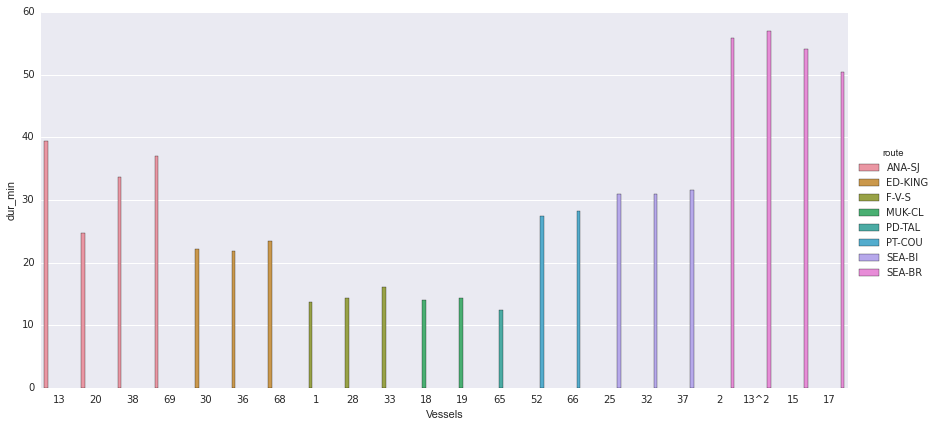

In [228]:
import seaborn

dff12=pd.read_csv('filtered_durmin.csv')

meanVes=dff12.groupby(['route','vesselID'])['dur_min'].mean()

print(meanVes)
#print(meanVes.get_group('ANA-SJ'))
#meanVes.plot()
meanVes=meanVes.reset_index()

meanVes['Vessels'] = meanVes['vesselID']
meanVes.loc[(meanVes['vesselID'] == 13) & (meanVes['route']=='SEA-BR'), 'Vessels'] = '13^2'



fg = seaborn.factorplot(x='Vessels', y='dur_min', hue='route', size=6,aspect=2 ,kind='bar', data=meanVes)
fg.savefig("routeave.png")
#meanVes.get_group('ANA-SJ')

#print(meanVes)